# BigQuery SQL

```
SELECT * 
FROM `ftds-hacktiv8-project.phase1_ftds_016_rmt.credit-card-information`
WHERE MOD(CUST_ID,2) = 0
```

# Problems

Buatlah model clustering untuk melakukan Customer Segmentation dari data kartu kredit sebuah bank dibawah ini. Data ini merupakan data informasi penggunaan kartu kredit selama 6 bulan terakhir. 

# Conceptual Problems

1. Apakah yang dimaksud dengan `inertia` pada algoritma K-Means ?

Inertia, a `sklearn.cluster.KMeans` attribute, is sum of squared distances of samples to their closest cluster center. The formula looks like this `np.sum( ( Euclidean distance point 1 )**2 + ... + ( Euclidean distance point N )**2 )`, euclidean distance is `np.sqrt( x**2 + y**2 )`.

In other words, the farther a point is to the center, the higher the inertia is. If we visualize it with a scatter plot, we will see the points to be scattered instead of clusterin near the centroid. Therefore, we can say, the higher the interia, the more variations there are.

Therefore, we can use Inertia to determine the best clustering (`sklearn.cluster.KMeans` n_clusters parameter). One way to do this is by visualizing it into line plot (x = number of custers, y = inertia). Simply find the elbow within the plot to find the optimal number of clusters.

2. Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !

Elbow method relies on the inertia score. Inertia score explains the total variations within a cluster. In other words, the farther a point to its centroid, the higher the variations is. If do a line plot with the inertia score, we will see an elbow. The elbow tells us that the reduction in variations after the elbow is insignificant.

The reason we use Elbow method: We use Elbow method because we want to reduce the variations within each cluster.

How to use Elbow method: We can use Elbow method by plotting the `sklearn.cluster.KMeans` inertia_ attribute as the y-axis and the number of clusters as the x-axis.

The weakness of Elbow method: It does not take into account whether a point has been assigned to the wrong cluster. In other words, inertia score incudes `np.sum ( Eucledian distance point outlier )**2 `. Therefore, we may deem that the inertia score after the elbow to be insignificant when in fact, there are still points that have been assigned to the wrong cluster (because the decision boundary overlaps with another cluster)

The strength: It is easy to interpret if we compared it to the silhouette score visualization. Just one graph and we are good to go. If we use silhouette score, we need to visualize the silhouette score against number of clusters. Then, we need to visualize the silhouette score against the coefficient. Then, we need to compare it between each plot (which is the plot that do not have minus silhouette coefficient (we calculate the silhouette coefficient for each point! Therefore we can know whether a point hve minus silhouette coefficient or not), which is the plot that have cluster roughly the same density, which is the plot that all cluster silhouette coefficient pass the silhouette score).

3. Jelaskan perbedaan masing-masing algoritma clustering yang anda gunakan dalam kasus ini !

We are going to use KMeans, DBScan and Spectral Clustering.

KMeans uses the Eucledian Distance to determine whether a point is part of a cluster or not by calculating the distance of a point to every centroid. Then, the point will be assigned to the cluster with the closest distance.

DBScan uses the distance between a point and centroid (we call it as epsilon) and a miinmum samples to determine whether a point is part of a cluster or an outlier.

Spectral Clustering uses the kernel function (e.g RBF) to determine the relationship between a point to a point. Then, the algorithm assign that point to a cluster that have strongest relationship with that point.

# 1 - Perkenalan

Name : Jason Rich Darmawan Onggo Putra

Dataset Overview: 

Objective:

**Features**

<table style="width: 85%;">
<tr>
  <th>Feature</th>
  <th>Description</th>
</tr>

<tr>
  <td>CUST_ID</td>
  <td>Identification of Credit Card holder</td>
</tr>

<tr>
  <td>BALANCE</td>
  <td>Balance amount left in their account to make purchases</td>
</tr>

<tr>
  <td>BALANCE_FREQUENCY</td>
  <td>How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)</td>
</tr>

<tr>
  <td>PURCHASES</td>
  <td>Amount of purchases made from account</td>
</tr>

<tr>
  <td>ONEOFF_PURCHASES</td>
  <td>Maximum purchase amount done in one-go</td>
</tr>

<tr>
  <td>INSTALLMENTS_PURCHASES</td>
  <td>Amount of purchase done in installment</td>
</tr>

<tr>
  <td>CASH_ADVANCE</td>
  <td>Cash in advance given by the user</td>
</tr>

<tr>
  <td>PURCHASES_FREQUENCY</td>
  <td>How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)</td>
</tr>

<tr>
  <td>ONEOFF_PURCHASES_FREQUENCY</td>
  <td>How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)</td>
</tr>

<tr>
  <td>PURCHASES_INSTALLMENTS_FREQUENCY</td>
  <td>How frequently purchases in installments are being made (1 = frequently done, 0 = not frequently done)</td>
</tr>

<tr>
  <td>CASH_ADVANCE_FREQUENCY</td>
  <td>How frequently the cash in advance being paid</td>
</tr>

<tr>
  <td>CASH_ADVANCE_TRX</td>
  <td>Number of Transactions made with 'Cash in Advanced'</td>
</tr>

<tr>
  <td>PURCHASES_TRX</td>
  <td>Number of purchase transactions made</td>
</tr>

<tr>
  <td>CREDIT_LIMIT</td>
  <td>Limit of Credit Card for user</td>
</tr>

<tr>
  <td>PAYMENTS</td>
  <td>Amount of Payment done by user</td>
</tr>

<tr>
  <td>MINIMUM_PAYMENTS</td>
  <td>Minimum amount of payments made by user</td>
</tr>

<tr>
  <td>PRC_FULL_PAYMENT</td>
  <td>Percent of full payment paid by user</td>
</tr>

<tr>
  <td>TENURE</td>
  <td>Tenure of credit card service for user</td>
</tr>
</table>

# 2 - Import Libraries

In [389]:
# Data Loading
import pandas as pd

# Exploratory Data Analysis
import numpy as np
import seaborn as sns

# Data Preprocessing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, PowerTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.express as px

# Model Evaluation
from sklearn.model_selection import GridSearchCV

# 3 - Data Loading

TODO
- [ ] Drop column 'CUST_ID' because it should not have collinearity with other features.
- Every features in the data set are numerical.

In [96]:
# Load dataset
dt = pd.read_csv("./h8dsft_P1G4_jason_rich_darmawan_onggo_putra.csv")

# Data set preview
with pd.option_context("display.float_format", "{:,.2f}".format):
    display(dt)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,788,16.58,0.12,200.00,0.00,200.00,0.00,0.12,0.00,0.12,0.00,0,2,"1,200.00",0.00,NaN,0.00,8
1,1902,943.58,0.88,103.00,103.00,0.00,0.00,0.12,0.12,0.00,0.00,0,1,"1,000.00",215.33,410.48,0.00,8
2,2322,1.98,0.12,80.00,80.00,0.00,0.00,0.12,0.12,0.00,0.00,0,1,"1,500.00",0.00,NaN,0.00,8
3,3426,461.46,1.00,585.00,585.00,0.00,0.00,0.12,0.12,0.00,0.00,0,1,"1,000.00",258.03,151.70,0.00,8
4,3976,"1,053.59",1.00,"1,450.00","1,450.00",0.00,0.00,0.12,0.12,0.00,0.00,0,1,"1,500.00",397.09,227.14,0.00,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,4630,"1,079.01",1.00,0.00,0.00,0.00,"1,259.57",0.00,0.00,0.00,0.55,9,0,"1,200.00","1,379.64",271.36,0.09,11
4471,8614,809.58,0.91,0.00,0.00,0.00,"3,819.67",0.00,0.00,0.00,0.55,7,0,"4,150.00","4,372.15",241.65,0.09,11
4472,4296,"3,386.49",1.00,560.98,427.22,133.76,"2,008.15",1.00,0.73,0.36,0.55,9,20,"10,100.00","1,039.00",886.05,0.00,11
4473,4476,"4,840.55",1.00,"1,595.93","1,595.93",0.00,"4,359.33",0.45,0.45,0.00,0.55,17,25,"6,000.00",905.84,"2,376.92",0.09,11


TODO
- [ ] Handle missing values on feature 'MINIMUM_PAYMENTS'.
- [ ] Handle missing values from feature 'CREDIT_LIMIT'.

Duly noted: We will handle these in [Data Preprocessing](#5---data-preprocessing)

In [3]:
# Check features dtype
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

In [89]:
# Prepare variable for preprocessor
num = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE']

# 4 - Exploratory Data Analysis

- Possible error but we can't confirm:
  - 'CASH_ADVANCE_FREQUENCY' max value is 1.17.
  - 'MINIMUM_PAYMENTS' min value is 0.04.

Duly noted: Regarding handling errors, without a confirmation from the data set owner, we will not handle it.

In [4]:
# Check central tendency
with pd.option_context("display.float_format", "{:.2f}".format):
    display(dt.describe())

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,4475.00,4475.00,4475.00,4475.00,4475.00,4475.00,4475.00,4475.00,4475.00,4475.00,4475.00,4475.00,4475.00,4474.00,4475.00,4317.00,4475.00,4475.00
mean,4476.00,1565.74,0.88,1003.16,588.50,415.03,973.45,0.49,0.20,0.36,0.13,3.20,14.49,4494.02,1726.21,854.43,0.16,11.52
std,2583.93,2091.21,0.24,2210.81,1666.50,927.36,2133.46,0.40,0.30,0.40,0.20,6.50,24.16,3668.54,2961.26,2306.41,0.30,1.35
min,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,150.00,0.00,0.04,0.00,6.00
25%,2239.00,132.54,0.89,40.06,0.00,0.00,0.00,0.08,0.00,0.00,0.00,0.00,1.00,1500.00,390.21,169.81,0.00,12.00
50%,4476.00,874.91,1.00,362.48,29.99,89.45,0.00,0.50,0.08,0.17,0.00,0.00,7.00,3000.00,831.05,309.85,0.00,12.00
75%,6713.00,2058.52,1.00,1122.64,580.32,484.25,1098.57,0.92,0.33,0.75,0.18,4.00,17.00,6000.00,1895.96,830.40,0.17,12.00
max,8950.00,19043.14,1.00,49039.57,40761.25,22500.00,29282.11,1.00,1.00,1.00,1.17,110.00,358.00,30000.00,46930.60,61031.62,1.00,12.00


- Every numerical columns are either moderately or highly skewed to the right except:
  - 'PURCHASES_FREQUENCY' distribution is approximately symmetric.
  - 'TENURE' distribution is highly skewed to the right.
- [ ] Handle natural outliers with `np.log10` and `sklearn.preprocessing.RobustScaler`

  RobustScaler is robust to outliers.

  [reference](https://stats.stackexchange.com/questions/164381/why-log-transforming-the-data-before-performing-principal-component-analysis)

  [reference 2](https://stats.stackexchange.com/questions/30728/how-small-a-quantity-should-be-added-to-x-to-avoid-taking-the-log-of-zero)

  Principal Component Analysis is very sensitive to outliers and can lead to misleading conclusions in the presence of outliers.

We will handle these in [Data Preprocessing](#5---data-preprocessing)

In [5]:
# Check skewness.
dt.skew()

CUST_ID                              0.000000
BALANCE                              2.456621
BALANCE_FREQUENCY                   -2.020309
PURCHASES                            8.987052
ONEOFF_PURCHASES                    10.140059
INSTALLMENTS_PURCHASES               8.116887
CASH_ADVANCE                         4.739678
PURCHASES_FREQUENCY                  0.061598
ONEOFF_PURCHASES_FREQUENCY           1.523455
PURCHASES_INSTALLMENTS_FREQUENCY     0.510288
CASH_ADVANCE_FREQUENCY               1.823380
CASH_ADVANCE_TRX                     4.752780
PURCHASES_TRX                        4.480452
CREDIT_LIMIT                         1.545078
PAYMENTS                             6.040773
MINIMUM_PAYMENTS                    12.357860
PRC_FULL_PAYMENT                     1.911650
TENURE                              -2.932822
dtype: float64

- It is easier to differentiate by eye with `np.log10`

MINIMUM_PAYMENTS skew 12.36
ONEOFF_PURCHASES skew 10.14
MINIMUM_PAYMENTS log skew 0.05
ONEOFF_PURCHASES skew -0.04


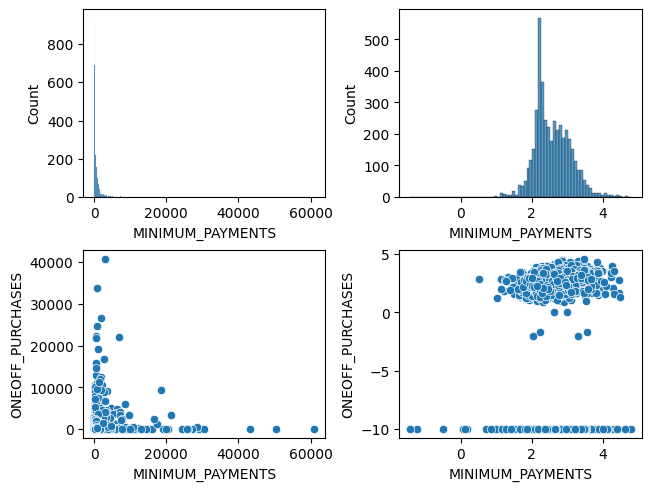

In [432]:
# Log Transformation demonstration
def isolate():
    fig, axes = plt.subplots(2,2, layout="constrained")

    dt_log = np.log10(dt + 10**-10)

    print("MINIMUM_PAYMENTS skew %.2f" % dt['MINIMUM_PAYMENTS'].skew())
    print("ONEOFF_PURCHASES skew %.2f" % dt['ONEOFF_PURCHASES'].skew())

    print("MINIMUM_PAYMENTS log skew %.2f" % dt_log['MINIMUM_PAYMENTS'].skew())
    print("ONEOFF_PURCHASES skew %.2f" % dt_log['ONEOFF_PURCHASES'].skew())

    sns.histplot(data=dt, x='MINIMUM_PAYMENTS', ax=axes[0][0])
    sns.histplot(data=dt_log, x='MINIMUM_PAYMENTS', ax=axes[0][1])
    sns.scatterplot(data=dt, x='MINIMUM_PAYMENTS', y='ONEOFF_PURCHASES', ax=axes[1][0])
    sns.scatterplot(data=dt_log, x='MINIMUM_PAYMENTS', y='ONEOFF_PURCHASES', ax=axes[1][1])

isolate()

- No outliers and gaussian-like distribution

  We will still use strategy median imputation for simplicity because in a gaussian-like distribution, median is similar to mean.

<AxesSubplot: xlabel='PURCHASES_FREQUENCY'>

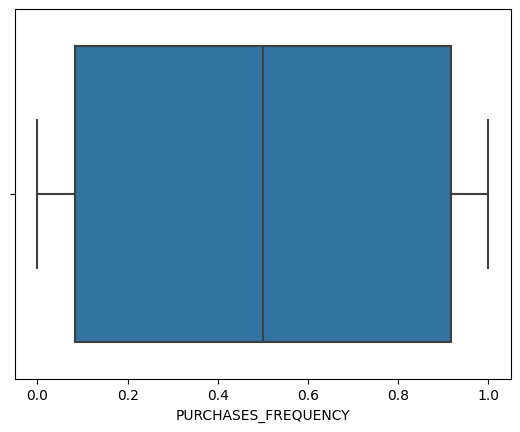

In [83]:
# Check if 'PURCHASES_FREQUENCY' have outliers.
sns.boxplot(data=dt, x='PURCHASES_FREQUENCY')

- 1/4 of the dataset have 'MINIMUM_PAYMENTS' > 'PAYMENTS'
  
  This indicates, 1/4 of the credit card company's customers have not paid in full the minimum payments.

- There are no value 0 in 'MINIMUM_PAYMENTS'. We concludes that if a customer has not pay the minimum payments. Therefore, imputation strategy with 0 is justified.
  - [x] Handle the missing values in 'MINIMUM_PAYMENTS' with `sklearn.impute.SimpleImputer(strategy='constant', fill_value=0)` (cancelled)

    The PC1, PC2, PC3 only accounts for 69.1% of the total variations if we impute the missing values for 'MINIMUM_PAYMENTS' with 0 (and without Log10 Transformation). Also, the plotted scatter points in 3D are hard to differentiate by eye.

In [62]:
# Check if MINIMUM_PAYMENTS < PAYMENTS
with pd.option_context("display.float_format", "{:,.2f}".format):
    display("MINIMUM_PAYMENTS > PAYMENTS", dt.loc[dt['MINIMUM_PAYMENTS'] > dt['PAYMENTS'],['PAYMENTS', 'MINIMUM_PAYMENTS']].count(axis=0))
    display("MINIMUM PAYMENTS < PAYMENTS", dt.loc[dt['MINIMUM_PAYMENTS'] < dt['PAYMENTS'],['PAYMENTS', 'MINIMUM_PAYMENTS']].count(axis=0))
    display("MINIMUM PAYMENTS sorted", dt[['PAYMENTS', 'MINIMUM_PAYMENTS']].sort_values(by='MINIMUM_PAYMENTS').head())

'MINIMUM_PAYMENTS > PAYMENTS'

PAYMENTS            1191
MINIMUM_PAYMENTS    1191
dtype: int64

'MINIMUM PAYMENTS < PAYMENTS'

PAYMENTS            3126
MINIMUM_PAYMENTS    3126
dtype: int64

'MINIMUM PAYMENTS sorted'

,PAYMENTS,MINIMUM_PAYMENTS
159,177.67,0.04
9,33.25,0.06
2327,887.98,0.31
574,789.26,0.32
1940,318.71,1.11


# 5 - Data Preprocessing

In [406]:
# Sampling for Inference Set
inf_set = dt.sample(n=10, random_state=17)

# Drop Inference Set from Train and Test Set
X_train = dt.drop(index=inf_set.index)

# Drop 'CUST_ID' because it does not have correlation with other features.
X_train.drop(labels='CUST_ID', axis=1, inplace=True, errors='ignore')

In [438]:
# Pipeline for data preprocessing
num_prep = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('log', FunctionTransformer(func=lambda x: np.log10(x + 10**-10))),
        ('scaler', RobustScaler())
    ]
)

composer = ColumnTransformer(transformers=[
    ('num_prep', num_prep, num)
])

preprocessor = Pipeline(steps=[
    ('composer', composer),
    ('pca', PCA())
])

## Ask Instructor

- [ ] Why is multicollinearity helps PCA?
- [ ] Why is feature with high multicollinearity is not more important in PC1, or PC2, or PC3 compared to other features?

In [439]:
# Check multicollinearity.
def isolate():
    X_train_final = composer.fit_transform(X=X_train)
    vif_data = pd.DataFrame()
    vif_data['Feature'] = composer.named_transformers_['num_prep'][-1] \
                                  .get_feature_names_out(num)
    vif_data['VIF'] = [variance_inflation_factor(X_train_final, i)
                       for i in range(len(vif_data['Feature']))]
    display(vif_data.sort_values(by='VIF', ascending=False)
                    .style.background_gradient(cmap='coolwarm'))

isolate()

,Feature,VIF
10,CASH_ADVANCE_TRX,2826.408009
9,CASH_ADVANCE_FREQUENCY,2553.973189
8,PURCHASES_INSTALLMENTS_FREQUENCY,1744.760051
4,INSTALLMENTS_PURCHASES,1708.213682
6,PURCHASES_FREQUENCY,1338.769034
3,ONEOFF_PURCHASES,1256.185148
7,ONEOFF_PURCHASES_FREQUENCY,1254.297749
2,PURCHASES,1222.875889
5,CASH_ADVANCE,768.556690
11,PURCHASES_TRX,306.672216


In [440]:
# Get Loading Score per PC.
def isolate():
    X_train_final = composer.fit_transform(X=X_train)
    pca = PCA()
    pca.fit(X=X_train_final)

    per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
    labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

    loadings = pd.DataFrame(data=pca.components_.T, 
                            columns=labels, 
                            index=composer.named_transformers_['num_prep'][-1]
                                          .get_feature_names_out(num))
    display(loadings.style.background_gradient(cmap='coolwarm'))

isolate()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
BALANCE,-0.065214,0.022288,-0.023546,-0.519432,-0.056907,-0.107919,0.078660,0.114453,0.142462,-0.776197,-0.202447,0.162649,-0.021079,-0.007057,-0.001712,-0.000476,-0.000165
BALANCE_FREQUENCY,-0.996131,-0.006852,0.059943,0.038032,0.001694,0.005591,-0.004729,-0.005006,-0.010035,0.046984,0.012246,-0.009784,0.001202,0.000458,0.000044,0.000027,0.000014
PURCHASES,0.003125,-0.562870,0.012798,-0.069731,0.122350,-0.013462,0.005444,-0.037674,-0.033120,-0.246350,0.630130,-0.445312,0.012169,-0.002189,0.016064,-0.004494,0.062922
ONEOFF_PURCHASES,-0.002467,-0.042537,-0.004469,-0.151949,0.484701,-0.102147,0.017846,-0.057381,0.433429,0.157394,0.036779,0.066807,0.006719,0.052405,-0.542251,0.028935,-0.458238
INSTALLMENTS_PURCHASES,0.000571,-0.048406,-0.006226,0.059515,-0.421431,-0.024277,-0.220533,0.131325,0.492840,0.043053,0.119733,-0.027167,-0.000866,-0.023597,0.453211,0.069108,-0.528629
CASH_ADVANCE,-0.002891,0.042879,-0.010581,-0.247387,0.039905,0.444513,-0.245276,0.010357,-0.036304,0.055146,0.021648,-0.018887,0.012862,0.815632,0.063642,-0.051506,0.008933
PURCHASES_FREQUENCY,0.005029,-0.588954,0.022232,0.019459,-0.085188,0.104183,0.026006,0.019558,-0.156048,0.081828,0.069672,0.769497,-0.040350,-0.002071,-0.009900,0.004270,-0.057353
ONEOFF_PURCHASES_FREQUENCY,-0.002479,-0.042408,-0.003966,-0.149689,0.483373,-0.098002,0.019714,-0.057696,0.430591,0.183782,-0.013360,0.147842,-0.006602,-0.044538,0.534567,-0.027756,0.446119
PURCHASES_INSTALLMENTS_FREQUENCY,0.000707,-0.047988,-0.005661,0.062811,-0.422287,-0.016734,-0.213810,0.134648,0.480520,0.061703,0.089795,0.039212,0.005786,0.026124,-0.455630,-0.069971,0.541988
CASH_ADVANCE_FREQUENCY,-0.002949,0.043441,-0.010538,-0.247714,0.043024,0.458822,-0.237319,0.014807,-0.028059,0.066404,0.022348,-0.027725,0.004284,-0.449144,-0.011147,-0.673476,-0.076257


- PC1, PC2, PC3 accounts for 99.1% of the total variations.

PC1, PC2, PC3 acccounts for 99.1% of the total variations


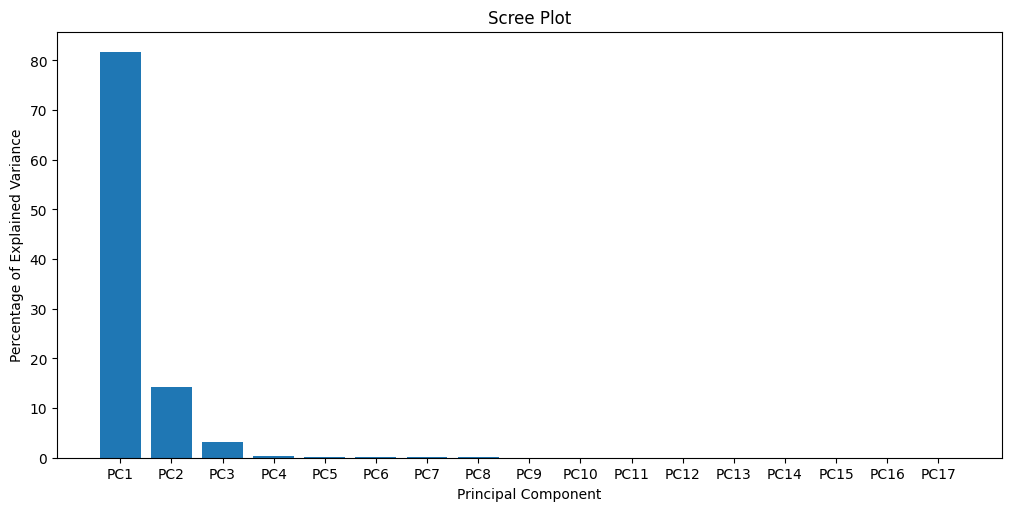

In [441]:
# Scree Plot
def isolate():
    X_train_final = composer.fit_transform(X=X_train)
    pca = PCA()
    pca.fit(X=X_train_final)

    per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
    labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

    print("PC1, PC2, PC3 acccounts for %s%% of the total variations" % (np.sum(per_var[:3])))

    fig, ax = plt.subplots(1,1, layout="constrained", figsize=(10,5))

    ax.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
    ax.set_ylabel('Percentage of Explained Variance')
    ax.set_xlabel('Principal Component')
    ax.set_title('Scree Plot')

isolate()

In [442]:
# PC1, PC2, PC3 visualization
def isolate():
    X_train_final = composer.fit_transform(X=X_train)
    pca_data = PCA().fit_transform(X=X_train_final)
    x, y, z = pca_data[:,:3].T

    fig = px.scatter_3d(x=x, y=y, z=z)
    fig.show()

isolate()